In [190]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Read the data from input

df = pd.read_csv('train.csv')

# Any results you write to the current directory are saved as output.
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


### Check Data Types

In [191]:
print(df.dtypes)

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 64, dtype: object


In [192]:
df.drop(["id"], axis=1, inplace=True)

In [193]:
df.shape

(75757, 63)

### Drop Duplicate rows

In [194]:
df.drop_duplicates(inplace=True)
df.shape

(75718, 63)

### Visualize all the missing data, the white lines are missing values

In [195]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df.percent_missing != 0.0]

,column_name,percent_missing
year_built,year_built,2.399694
energy_star_rating,energy_star_rating,35.238649
direction_max_wind_speed,direction_max_wind_speed,54.240735
direction_peak_wind_speed,direction_peak_wind_speed,55.202198
max_wind_speed,max_wind_speed,54.240735
days_with_fog,days_with_fog,60.465147


In [196]:
col_high_missing = ['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
df.drop(col_high_missing,1)

<ipython-input-196-c566ffbf1096>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(col_high_missing,1)


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,55.147541,6,0,0,0,25,3,0,0,132.918411
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,55.147541,6,0,0,0,25,3,0,0,39.483672
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,47.911202,26,2,0,0,6,0,0,0,48.404398
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,47.911202,26,2,0,0,6,0,0,0,592.022750


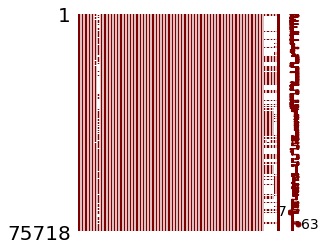

In [197]:
# search for missing data
import missingno as msno
msno.matrix(df, figsize=(4,4), color=(0.5,0,0))

<ipython-input-198-3ca75693dc33>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


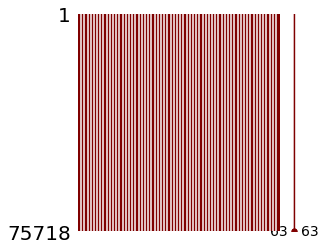

In [198]:
df = df.fillna(df.median())

# Visualize again
import missingno as msno
msno.matrix(df, figsize=(4,4), color=(0.5,0,0))

### Let's filling the missing data with the median value and drop feature columns with lots of missing data

### Check the target distribution

### Lets see the correlations between features

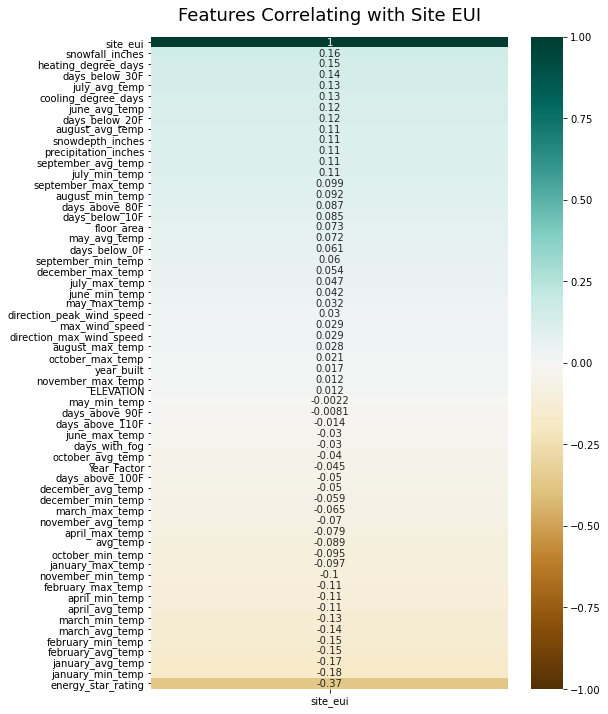

In [199]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['site_eui']].sort_values(by='site_eui', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Site EUI', fontdict={'fontsize':18}, pad=16);

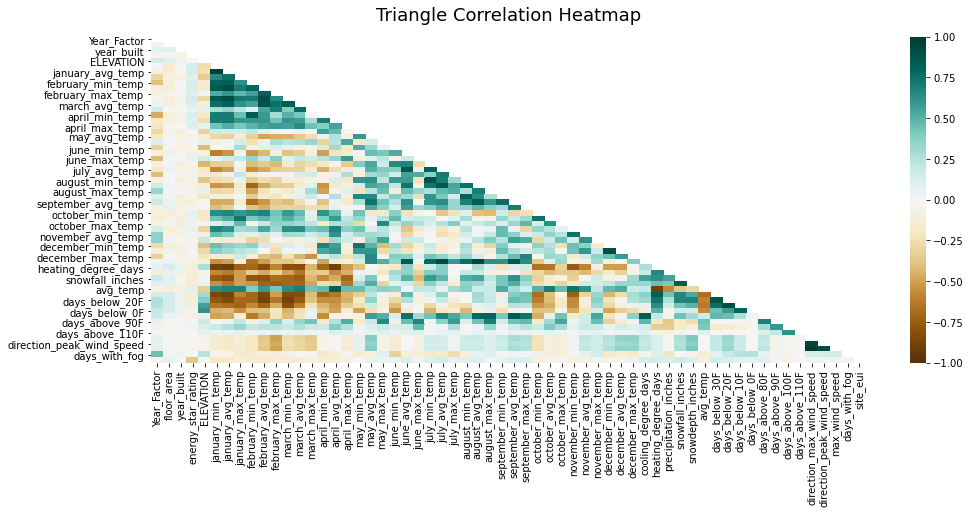

In [200]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [201]:
def correlation(dataframe, threshold):
    high_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and ((corr_matrix.columns[j], corr_matrix.columns[i]) not in high_corr):
                columns = (corr_matrix.columns[i], corr_matrix.columns[j]) # getting the name of the columns
                high_corr.add(columns)

    return high_corr

high_corr = correlation(df, 0.95)
print(high_corr)

{('max_wind_speed', 'direction_max_wind_speed'), ('january_avg_temp', 'january_min_temp'), ('cooling_degree_days', 'august_avg_temp')}


In [202]:
df.drop(columns=['january_min_temp', 'direction_max_wind_speed'], axis=1, inplace=True)

<ipython-input-203-bb98e3e089c8>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


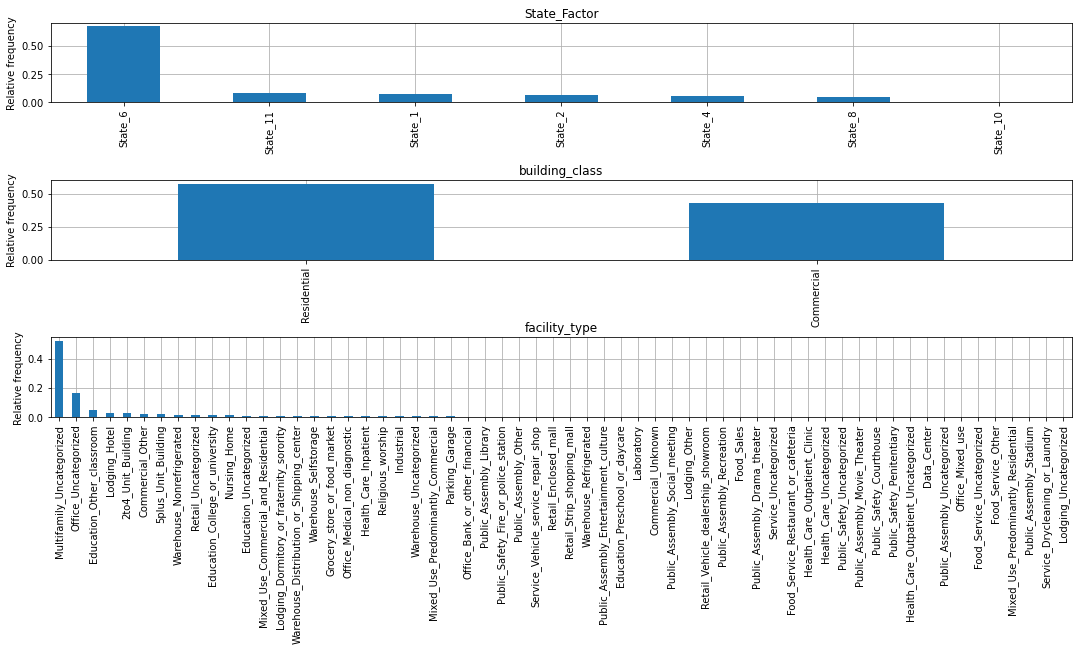

In [203]:
def plot_distbn(column, column_name, num):
    plt.subplot(num)
    column.value_counts(normalize=True).plot(kind='bar')
    plt.title(column_name)
    plt.ylabel('Relative frequency')
    plt.tight_layout()
    plt.grid(True)
    
    return column.value_counts(normalize=True)


plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(15,6))
rel_freqs1 = plot_distbn(df['State_Factor'], 'State_Factor', 311)
rel_freqs2 = plot_distbn(df['building_class'], 'building_class', 312)
rel_freqs3 = plot_distbn(df['facility_type'], 'facility_type', 313)

In [204]:
significant = rel_freqs3.index[:6].tolist()
print(significant)

['Multifamily_Uncategorized', 'Office_Uncategorized', 'Education_Other_classroom', 'Lodging_Hotel', '2to4_Unit_Building', 'Commercial_Other']


In [205]:
df['facility_type'].loc[~df['facility_type'].isin(significant)] = 'Others'
df['facility_type'].loc[~df['facility_type'].isin(significant)] = 'Others'
df.head()

<ipython-input-205-4fc7d020f1ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facility_type'].loc[~df['facility_type'].isin(significant)] = 'Others'
<ipython-input-205-4fc7d020f1ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facility_type'].loc[~df['facility_type'].isin(significant)] = 'Others'


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,january_max_temp,...,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,1,State_1,Commercial,Others,61242.0,1942.0,11.0,2.4,50.5,68,...,0,0,14,0,0,0,1.0,1.0,104.0,248.682615
1,1,State_1,Commercial,Others,274000.0,1955.0,45.0,1.8,50.5,68,...,0,0,14,0,0,0,1.0,1.0,12.0,26.500150
2,1,State_1,Commercial,Others,280025.0,1951.0,97.0,1.8,50.5,68,...,0,0,14,0,0,0,1.0,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,50.5,68,...,0,0,14,0,0,0,1.0,1.0,12.0,48.406926
4,1,State_1,Commercial,Others,66000.0,1985.0,100.0,2.4,50.5,68,...,0,0,14,0,0,0,1.0,1.0,104.0,3.899395


In [206]:
# string labels to categorical values

for i in range(df.shape[1]):
    if df.iloc[:,i].dtypes != object:
        scaler = preprocessing.StandardScaler().fit(df.iloc[:,i].values.reshape(-1,1))
        df.iloc[:,i] = scaler.transform(df.iloc[:,i].values.reshape(-1,1))
    if df.iloc[:,i].dtypes == object:
        le = LabelEncoder()
        le.fit(list(df.iloc[:,i].values))
        df.iloc[:,i] = le.transform(list(df.iloc[:,i].values))

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['site_eui'], test_size=0.2, random_state=42)

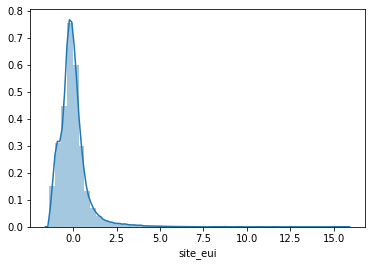

In [208]:
ax = sns.distplot(y_train)
plt.show()

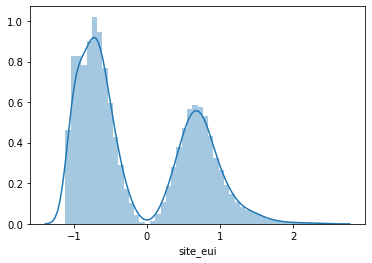

In [209]:
y_train = np.cbrt(y_train)

ax = sns.distplot(y_train)
plt.show()

### We can use a random forest regressor to tell us which features matter most

Training done using Random Forest


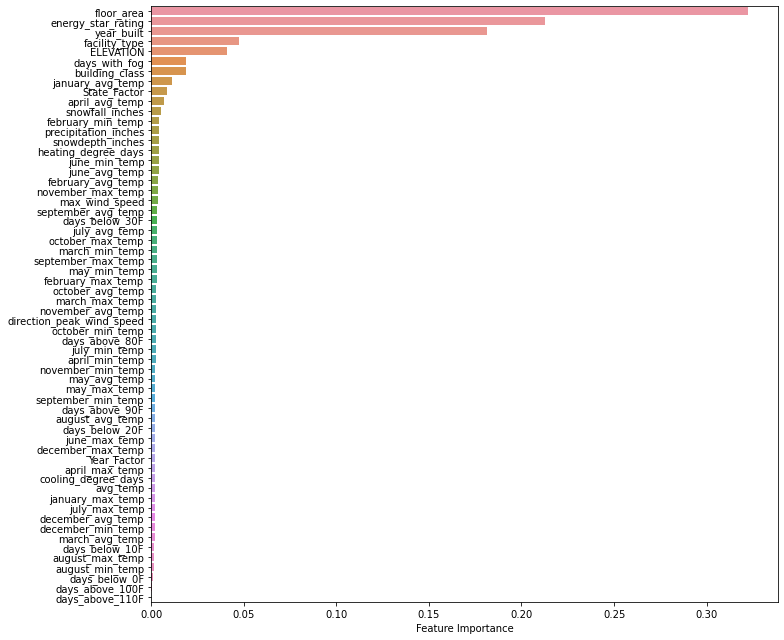

In [210]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(df.iloc[:,:-1], df['site_eui'])
print("Training done using Random Forest")

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11,9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("Feature Importance")
plt.tight_layout()
plt.show()

### We'll use the top 30 features only for our learning models and create a new feature which describes the interaction of our top two features, called "Interaction"

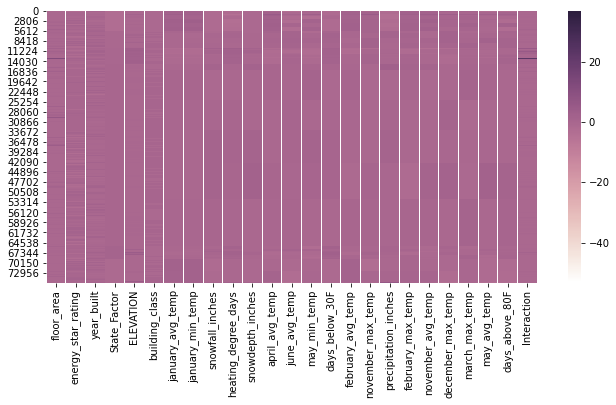

In [21]:
X_train = X_train.loc[:,['floor_area','energy_star_rating','year_built','facility_type','State_Factor','ELEVATION',
                         'building_class','january_avg_temp','january_min_temp','snowfall_inches','heating_degree_days']]
#                          'snowdepth_inches','april_avg_temp','june_avg_temp','may_min_temp', 'days_below_30F',
#                          'february_avg_temp','november_max_temp','precipitation_inches','february_max_temp',
#                          'november_avg_temp','december_max_temp', 'march_max_temp','may_avg_temp','days_above_80F']]
X_test = X_test.loc[:,['floor_area','energy_star_rating','year_built','State_Factor','ELEVATION',
                         'building_class','january_avg_temp','january_min_temp','snowfall_inches','heating_degree_days']]
#                          'snowdepth_inches','april_avg_temp','june_avg_temp','may_min_temp', 'days_below_30F',
#                          'february_avg_temp','november_max_temp','precipitation_inches','february_max_temp',
#                          'november_avg_temp','december_max_temp', 'march_max_temp','may_avg_temp','days_above_80F']]


X_train["floor_area:energy_star_rating"] = X_train["floor_area"]*X_train["energy_star_rating"]
X_test["floor_area:energy_star_rating"] = X_test["floor_area"]*X_test["energy_star_rating"]

X_train["floor_area:ELEVATION"] = X_train["floor_area"]*X_train["ELEVATION"]
X_test["floor_area:ELEVATION"] = X_test["floor_area"]*X_test["ELEVATION"]
    
# heatmap
f, ax = plt.subplots(figsize=(11, 5))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(X_train, cmap=cmap)
plt.show()

### Check features for linearity and their importance towards Sale Price

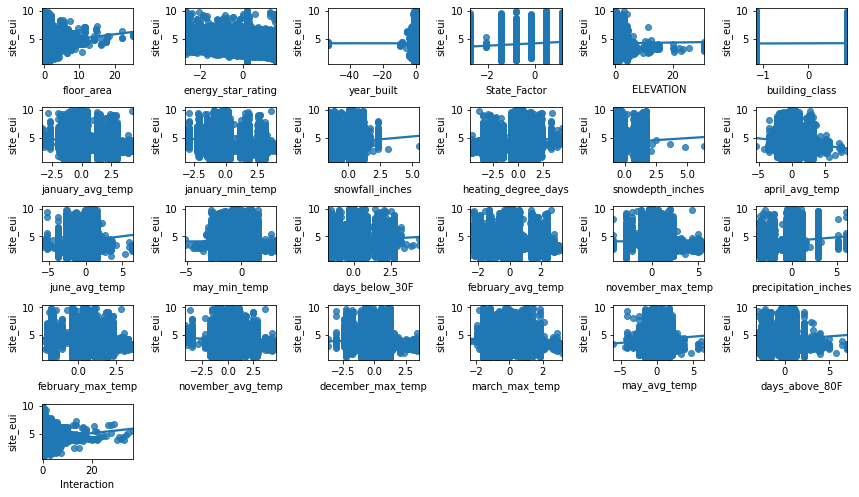

In [22]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(25):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

### Let's delete the outliers

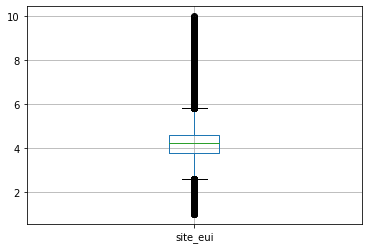

In [23]:
pd.DataFrame(y_train).boxplot()

In [24]:
Xmat = X_train
Xmat['site_eui'] = y_train
Xmat = Xmat.drop(Xmat[(Xmat['snowdepth_inches']>2.5) & (Xmat['site_eui']>9)].index)
Xmat = Xmat.drop(Xmat[(Xmat['snowfall_inches']>3) & (Xmat['site_eui']>9)].index)

# Make our training and test set ready for model analysis
y_train = Xmat['site_eui']
X_train = Xmat.drop(['site_eui'], axis=1)

### First we'll use XGBoost

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("Parameter Optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                       {'max_depth': [2,4,6],
                       'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(X_train,y_train)
print(reg_xgb.best_score_)
print(reg_xgb.best_params_)

/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Parameter Optimization
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.

0.17157532051630506
{'max_depth': 2, 'n_estimators': 50}


### Next our Neural Network using Tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
reg_dl.fit(X_train, y_train)

print(reg_dl.best_score_)
print(reg_dl.best_params_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


### Finally a Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                      param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                                 "gamma": np.logspace(-2,2,5)})# 

reg_svr.fit(X_train, y_train)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

param_test1 = {'n_estimators':range(20,81,10)}
reg_gbm = GridSearchCV(GradientBoostingRegressor((learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,subsample=0.8,random_state=10)), cv=5,
                      param_grid=param_test1, cv=5)# 

reg_svr.fit(X_train, y_train)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

## Let's put all our model predictions into a DataFrame

In [ ]:
# second feature matrix
X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_train),
     'GBR': reg_gbm.predict(X_train),#.ravel(),
     'SVR': reg_svr.predict(X_train),
    })
X_train2.head()

### Here we're going to use Ensemble Modeling. We're going to combine our models using a Linear Regressor to give us the weighted average of prediction accuracy. Models with higher accuracy will be given more weight. 

#### Since we're still using the data at logscale, we need to bring our predictions back to normal scale in the last line.

In [ ]:
# second-feature modeling using linear regression
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train)

# prediction using the test set
X_test2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test),
     'GBR': reg_gbm.predict(X_test),#.ravel(),
     'SVR': reg_svr.predict(X_test),
    })

# Non-log scale
y_pred = (reg.predict(X_test2))^3

In [ ]:
# Final Predictions on home prices
submission = pd.DataFrame({
    "id": test_ID,
    "site_eui": y_pred
})
submission.to_csv('submission.csv', index=False)

## Show the first thirty sale price predictions along with the house ID
submission[:30]